In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.spatial import distance
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise_distances
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import davies_bouldin_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import AgglomerativeClustering




As an artificial intelligence expert, a fashion company has invited you to help cluster the clothing images. You will be provided with a dataset with each sample corresponding to an image. Each image measures 28 pixels in height and 28 pixels in width, totaling 784 pixels.
These images are stored in a table, representing the pixels across 784 columns. Each column has a single pixel value, which is an integer ranging from 0 (black) to 255 (white).
To locate a pixel on the image, suppose we have the pixel at row j and column k of a 28×28 matrix; we can find its pixel value at the i-th column of the table, where i = j×28 + k where j and k are integers between 0 and 27.


Your task is to use clustering algorithms to cluster these images. For example, you may find some images belonging to the cluster of pants, while others may be T-shirts, etc.
In the training stage, you will be provided with a public dataset comprising 3000 samples. The goal is to cluster these samples and assign the clustering results to each sample. In the test stage, your predictions will be evaluated using the adjusted rand score as the final performance. Please note that using any pre-trained models is not allowed, nor is the use of any form of external data permitted.
Hint: The number of clothing clusters is unknown. You need to determine the cluster number via analysis.
Hint: You can try various clustering algorithms to find the most suitable one.
Hint: You can use internal evaluation metrics, like the Davies-Bouldin Index, Dunn Index, and Silhouette Coefficient, to fine-tune hyperparameters.

In [2]:
def read_data_from_csv(path):
    """Load datasets from CSV files.
    Args:
        path (str): Path to the CSV file.
    Returns:
        X (np.ndarray): Features of samples.
        y (np.ndarray): Labels of samples, only provided in the public datasets.
    """
    assert os.path.exists(path), f'File not found: {path}!'
    assert os.path.splitext(path)[
        -1] == '.csv', f'Unsupported file type {os.path.splitext(path)[-1]}!'

    data = pd.read_csv(path)
    column_list = data.columns.values.tolist()

    if 'Label' in column_list:
        # for the public dataset, label column is provided.
        column_list.remove('Label')
        X = data[column_list].values
        y = data['Label'].astype('int').values
        return X, y
    else:
        # for the private dataset, label column is not provided.
        X = data[column_list].values
        return X

X_public = read_data_from_csv('assignment_4_public.csv')
print('Shape of X_public:', X_public.shape)



Shape of X_public: (3000, 784)


In [3]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_public)

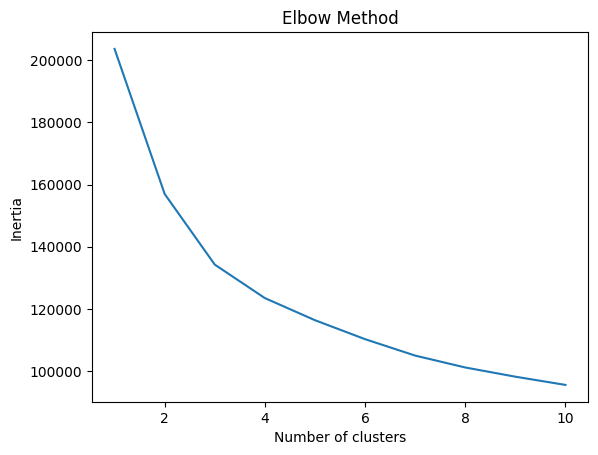

In [ ]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(X_normalized)
    inertia.append(kmeans.inertia_)



plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [ ]:
inertia

[203584.71297040983,
 156960.40463435822,
 134261.74327083654,
 123501.56993774277,
 116396.31776818214,
 110300.5339146063,
 105020.15236472897,
 101200.05087688286,
 98240.20974759768,
 95595.78722631537]

In [ ]:
kmeans = KMeans(n_clusters=7, random_state=0, n_init=10)
# kmeans = KMeans(n_clusters=5, random_state=0)


kmeans.fit(X_normalized)
preds = kmeans.labels_

In [ ]:
def run_silScore_Kmeans(start, end, x_data):

    for i in range(start, end+1):
        #  Run model
        kmeans = KMeans(n_clusters=i, random_state=0, n_init=10)
        kmeans.fit(x_data)
        preds = kmeans.labels_

        silhouette_avg = silhouette_score(x_data, preds)
        print("The Silhouette score of ",  i, " clustering is:", silhouette_avg)

In [ ]:
run_silScore_Kmeans(2, 11, X_normalized)

The Silhouette score of  2  clustering is: 0.2021366100910641
The Silhouette score of  3  clustering is: 0.19218709632654576
The Silhouette score of  4  clustering is: 0.19619066770730031
The Silhouette score of  5  clustering is: 0.16340727177454903
The Silhouette score of  6  clustering is: 0.15726491876408735
The Silhouette score of  7  clustering is: 0.15263987653918293
The Silhouette score of  8  clustering is: 0.14060211178682744
The Silhouette score of  9  clustering is: 0.13517294682517436
The Silhouette score of  10  clustering is: 0.13822270938928588
The Silhouette score of  11  clustering is: 0.12990498463572428


In [ ]:
# try hierarchical clustering
def run_silScore_Hierar(start, end, X_public):

    for i in range(start, end+1):
        #  Run model
        agg_clustering = AgglomerativeClustering(n_clusters=i)
        agg_clustering.fit(X_public)
        preds = agg_clustering.labels_

        silhouette_avg = silhouette_score(X_public, preds)
        print("The Silhouette score of ",  i, " clustering is:", silhouette_avg)


In [ ]:
run_silScore_Hierar(2, 11, X_public)

The Silhouette score of  2  clustering is: 0.17139249952972613
The Silhouette score of  3  clustering is: 0.16806957137240286
The Silhouette score of  4  clustering is: 0.17827236111183653
The Silhouette score of  5  clustering is: 0.1593330984274979
The Silhouette score of  6  clustering is: 0.17328816455371748
The Silhouette score of  7  clustering is: 0.13028257047495287
The Silhouette score of  8  clustering is: 0.10917634085821112
The Silhouette score of  9  clustering is: 0.10563334060469272
The Silhouette score of  10  clustering is: 0.11205942065952319
The Silhouette score of  11  clustering is: 0.10770343636092493


For hierarchical clustering, 4 and 6 seem the best.<br>
And K-mean, 2, 4 and 5 are also good clusters

In [ ]:
# # Assuming you have the ground truth labels for the public dataset
# ground_truth_labels = pd.read_csv('ground_truth_labels.csv')['Label'].values
# score = adjusted_rand_score(ground_truth_labels, preds)
# print('Adjusted Rand Score:', score)

In [ ]:
def comparsionIndex(num_cluster, x_data, preds):
    print("\n\nClustering result/score of ", num_cluster, ": ")
    # Calculate Silhouette Coefficient
    silhouette_avg = silhouette_score(x_data, preds)
    print("Silhouette Coefficient:", silhouette_avg)

    # Calculate Davies-Bouldin Index
    davies_bouldin_index = davies_bouldin_score(x_data, preds)
    print("Davies-Bouldin Index:", davies_bouldin_index)

    # Calculate Dunn Index
    distances = pairwise_distances(x_data)
    min_inter_cluster_distance = distance.cdist(x_data, x_data)[preds != preds[:, None]].min()
    max_intra_cluster_distance = distances[preds == preds[:, None]].max()
    dunn_index = min_inter_cluster_distance / max_intra_cluster_distance
    print("Dunn Index:", dunn_index)

Silhouette Coefficient: in between 1 and -1. It is better when closer to 1.

Davies-Bouldin Index: is the <b>lower</b> the better clustering.

Dunn Index: is the <b>higher</b> the better


In [ ]:
# the scores of Kmeans
KM_clustering_list = [2, 3, 4, 5]

#  Run model
for i in KM_clustering_list:
        kmeans = KMeans(n_clusters=i, random_state=0, n_init=10)
        kmeans.fit(X_normalized)
        preds = kmeans.labels_
        comparsionIndex(i, X_normalized, preds)





Clustering result/score of  2 : 
Silhouette Coefficient: 0.2021366100910641
Davies-Bouldin Index: 1.7695002307827108
Dunn Index: 0.12236488554632793


Clustering result/score of  3 : 
Silhouette Coefficient: 0.19218709632654576
Davies-Bouldin Index: 1.7381384681926655
Dunn Index: 0.12051730760191069


Clustering result/score of  4 : 
Silhouette Coefficient: 0.19619066770730031
Davies-Bouldin Index: 1.824353488486126
Dunn Index: 0.12194701435017224


Clustering result/score of  5 : 
Silhouette Coefficient: 0.16340727177454903
Davies-Bouldin Index: 1.9229197080888256
Dunn Index: 0.14494718187781444


In [ ]:
X_public = read_data_from_csv('assignment_4_public.csv')

# the scores of hierarchical clustering
Hier_clustering_list = [4, 6]

#  Run model
for i in Hier_clustering_list:
        agg_clustering = AgglomerativeClustering(n_clusters=i)
        agg_clustering.fit(X_public)
        preds = agg_clustering.labels_
        comparsionIndex(i, X_public, preds)



Clustering result/score of  4 : 
Silhouette Coefficient: 0.17827236111183653
Davies-Bouldin Index: 1.9264056895507702
Dunn Index: 0.16355222884327095


Clustering result/score of  6 : 
Silhouette Coefficient: 0.17328816455371748
Davies-Bouldin Index: 1.6770835203576937
Dunn Index: 0.17947883637871917


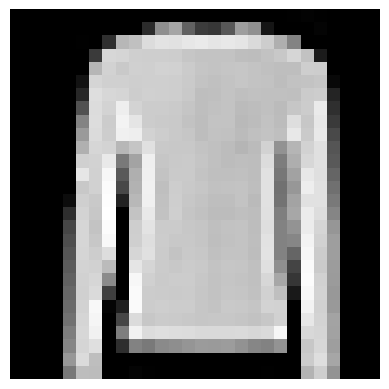

In [ ]:
#   reformate the columns to image. rowNo is the No. n of records in 3000 samples
# choose a number in between 0 and 3000
rowNo = 113
xpublic = pd.DataFrame(X_public)
image_row = xpublic.iloc[rowNo].values
image_matrix = image_row.reshape(28, 28)

plt.imshow(image_matrix, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
submission = pd.DataFrame({'Label': preds})
submission.to_csv('assignment_4.csv', index=True, index_label='Id')

In [6]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Try different numbers of clusters
n_clusters_list = range(2, 8)
silhouette_scores = []
clusterings = []

# Perform K-Means clustering for each number of clusters
for n_clusters in n_clusters_list:
    kmeans = KMeans(n_clusters=n_clusters, random_state=1)
    clustering = kmeans.fit_predict(X_normalized)
    clusterings.append(clustering)
    silhouette_avg = silhouette_score(X_normalized, clustering)
    silhouette_scores.append(silhouette_avg)

# Find the optimal number of clusters
optimal_n_clusters = n_clusters_list[np.argmax(silhouette_scores)]
print("Optimal number of clusters:", optimal_n_clusters)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Optimal number of clusters: 2


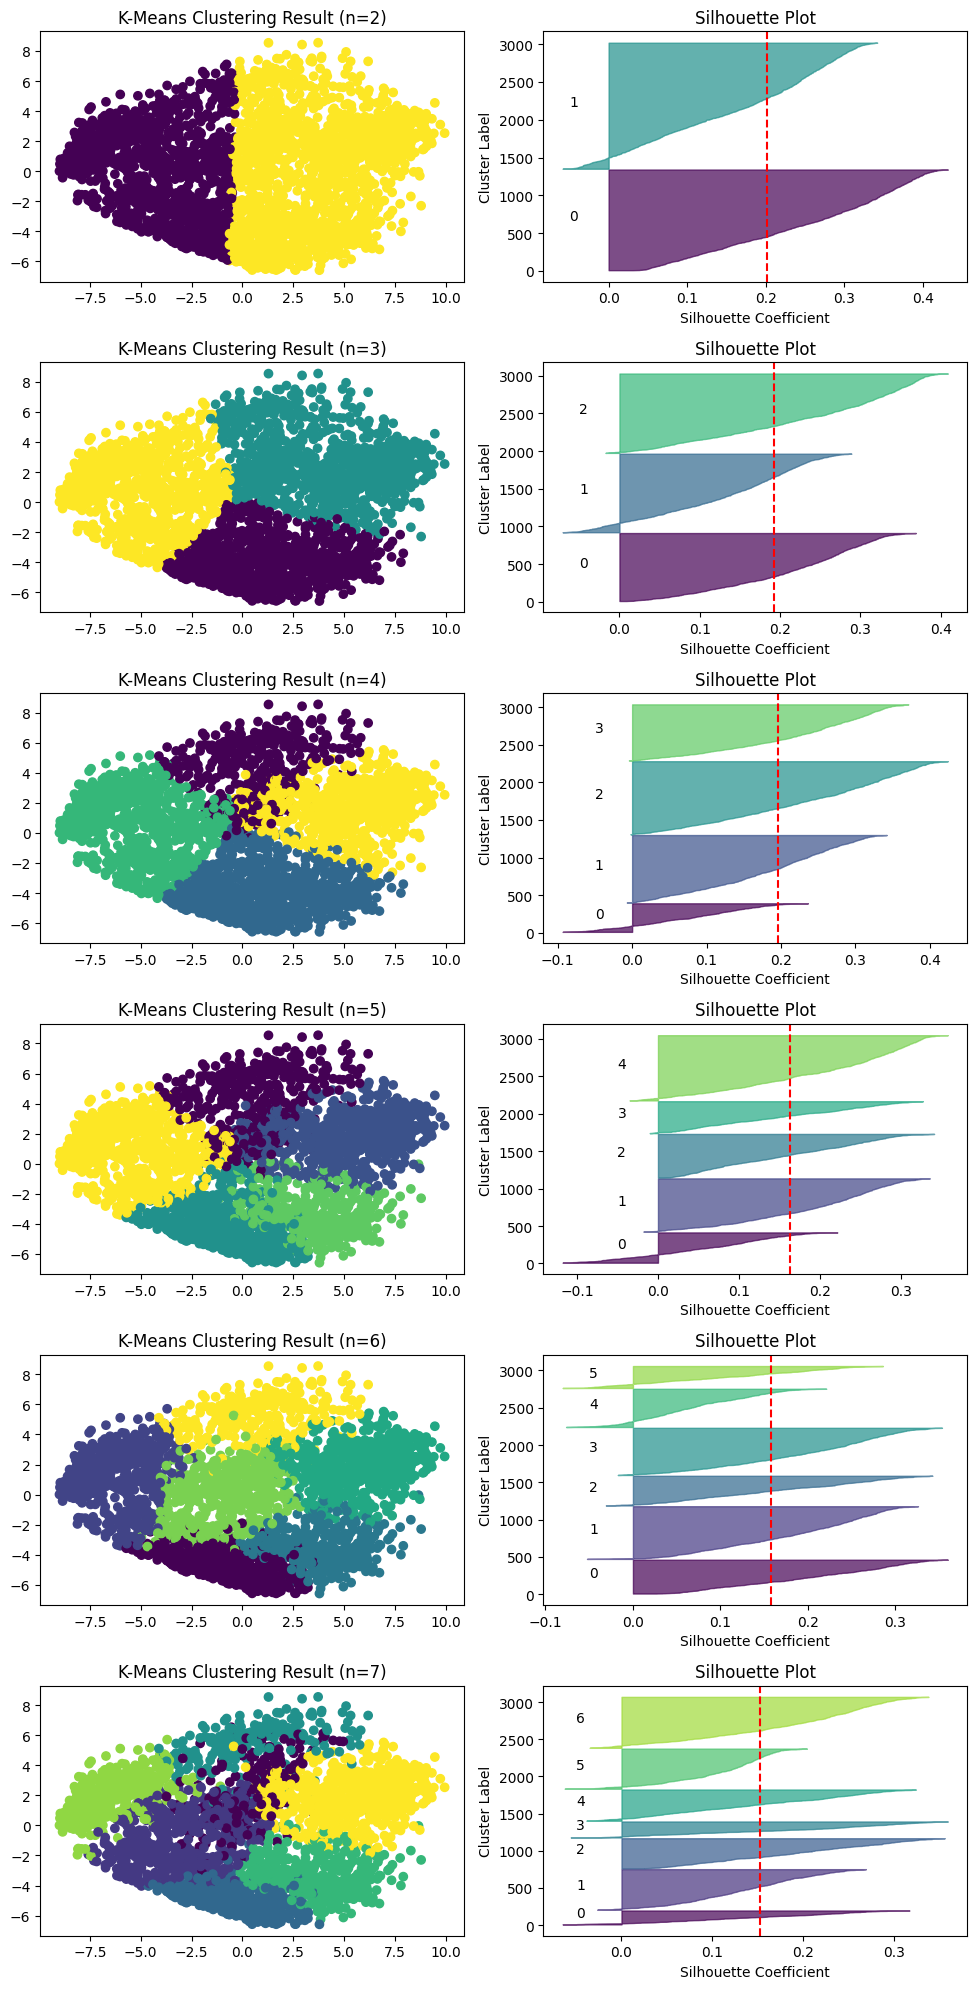

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Apply PCA to reduce the dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

# Visualize the clustering results
fig, axes = plt.subplots(len(n_clusters_list), 2, figsize=(10, 20))

for i, clustering in enumerate(clusterings):
    n_clusters = n_clusters_list[i]
    silhouette_avg = silhouette_scores[i]
    ax1 = axes[i][0]
    ax2 = axes[i][1]

    # Plot data points with color-coded clusters
    ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=clustering, cmap='viridis')
    ax1.set_title(f'K-Means Clustering Result (n={n_clusters})')

    # Plot silhouette plot
    sample_silhouette_values = silhouette_samples(X_normalized, clustering)
    y_lower = 10

    for j in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[clustering == j]
        ith_cluster_silhouette_values.sort()
        size_cluster_j = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j

        color = plt.cm.viridis(j / n_clusters)
        ax2.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        ax2.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))
        y_lower = y_upper + 10

    ax2.set_title("Silhouette Plot")
    ax2.set_xlabel("Silhouette Coefficient")
    ax2.set_ylabel("Cluster Label")
    ax2.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.tight_layout()
plt.show()
